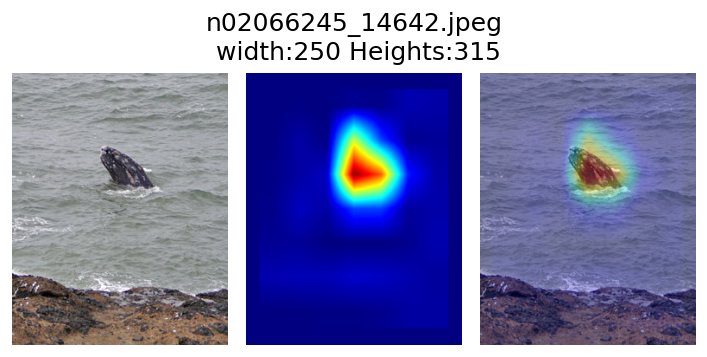

In [28]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision as trv
from GradCam_model import GradResnet50
from PIL import Image
import cv2

#Img path
IMG_PATH = "data/n02066245_14642.jpeg"

#Build Model
grad_model = GradResnet50()

#Extract filename
file_name = os.path.basename(IMG_PATH)

#Load Image
img = Image.open(IMG_PATH)

#Access heatmap in RGB
heatmap = grad_model.Gradheatmap(img)

#Convert Image to array
img = np.array(img)

#Mix heatmap and img
superimposed_img = heatmap * 0.3 + img.astype(np.float32) * 0.7
superimposed_img = np.uint8(np.clip(superimposed_img, 0, 255))


#Show img
img_list = [img, heatmap, superimposed_img]

fig, ax = plt.subplots(1, 3, dpi=120, facecolor=(1, 1, 1))

for i in range(1, 4):
    axx = plt.subplot(1, 3, i)
    plt.imshow(img_list[i-1])
    plt.axis("off")

plt.tight_layout()
fig.suptitle("Heatmap", fontsize=15)
fig.subplots_adjust(top=1.1)
fig.suptitle(f"{file_name}\n width:{img.shape[1]} Heights:{img.shape[0]}", fontsize=15)
fig.savefig('Result.png', bbox_inches="tight")
plt.show()